In [1]:
import numpy as np

# Getting Matrix Values
mCSV = np.genfromtxt("50-samples.csv", skip_header=1, delimiter=",", dtype=float)
mCSVt = np.transpose(mCSV)

# Set the floatmode to 'fixed'
np.set_printoptions(floatmode='fixed')

# Display the transposed CSV data
print(mCSVt.astype(int))

[[  0   1   2   3   4   5   6   7   8   9  10  11  12]
 [  5  12  25  44  69 100 137 180 229 284 345 412 485]]


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [3]:
tealScale = {
  0: '#E0F2F1', 1: '#B2DFDB', 2: '#80CBC4',
  3: '#4DB6AC', 4: '#26A69A', 5: '#009688',
  6: '#00897B', 7: '#00796B', 8: '#00695C',
  9: '#004D40'
}

In [4]:
pairCSV = np.genfromtxt(
  "50-samples.csv",
  skip_header=1, delimiter=",", dtype=int)

# Extract y values from CSV data
y_observed = pairCSV[:, 1]

In [5]:
# Calculate mean and standard deviation of y
y_mean = np.mean(y_observed)
y_std = np.std(y_observed)

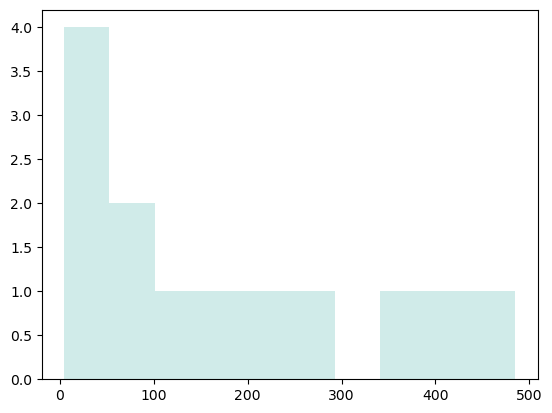

In [6]:
# Create histogram
hist_counts, bins, _ = plt.hist(
  y_observed, bins=10, alpha=0.6,
  color=tealScale[1])

In [7]:
# Find the bin with the highest count
max_bin_index = np.argmax(hist_counts)
max_bin_value = bins[max_bin_index]

# Calculate the width of each bin
bin_width = bins[1] - bins[0]

In [8]:
# Plot normal distribution scaled to match histogram
x_range = np.linspace(
  min(y_observed), max(y_observed), 1000)
y_standard = norm.pdf(
  x_range, y_mean, y_std)
scaled_y_standard = y_standard \
  * len(y_observed) * bin_width

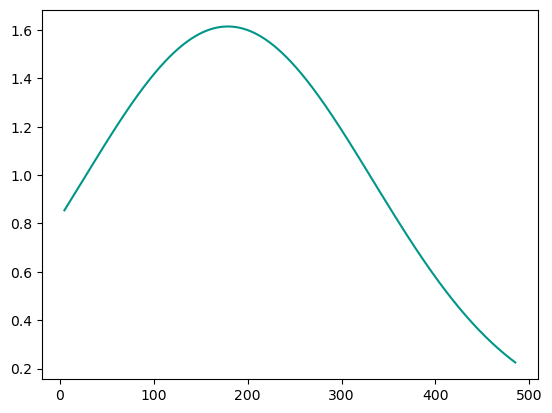

In [9]:
plt.plot(x_range, scaled_y_standard,
  label='Standard Normal', color=tealScale[5])

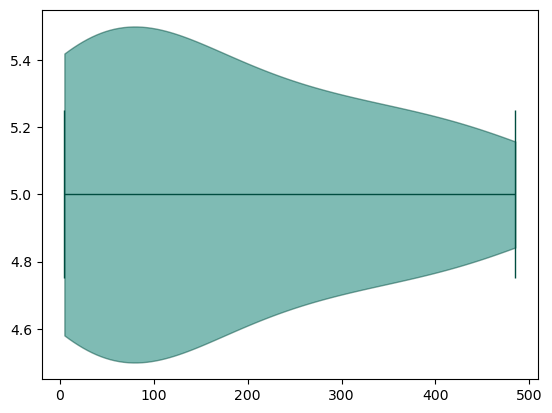

In [10]:
# Plot violin plot horizontally
violin = plt.violinplot(y_observed,
  vert=False, positions=[max_bin_value], widths=1)

for pc in violin["bodies"]:
    pc.set_facecolor(tealScale[7])
    pc.set_edgecolor(tealScale[9])
    pc.set_alpha(0.5)

# Make all the violin statistics marks red:
for partname in ('cbars','cmins','cmaxes'):
    vp = violin[partname]
    vp.set_edgecolor(tealScale[9])
    vp.set_linewidth(1)

{'whiskers': [<matplotlib.lines.Line2D at 0x7c99ffeecd90>,
 'caps': [<matplotlib.lines.Line2D at 0x7c99ffeee4d0>,
 'boxes': [<matplotlib.patches.PathPatch at 0x7c99ffe35a10>],
 'medians': [<matplotlib.lines.Line2D at 0x7c99ffeefa50>],
 'fliers': [<matplotlib.lines.Line2D at 0x7c99ffefc550>],
 'means': []}

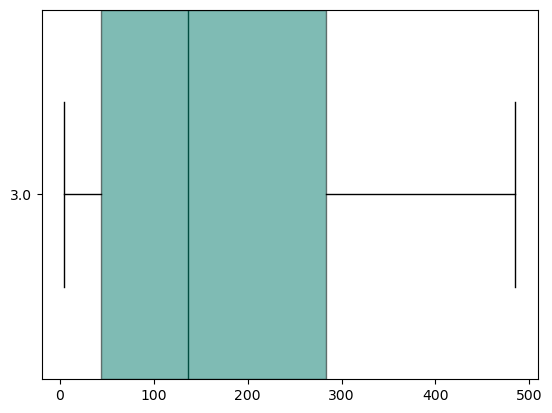

In [11]:
# Plot boxplot
plt.boxplot(y_observed,
  vert=False, positions=[max_bin_value-2],
  widths=1, patch_artist=True,
  boxprops=dict(facecolor=tealScale[7], alpha=0.5),
  medianprops=dict(color=tealScale[9]))

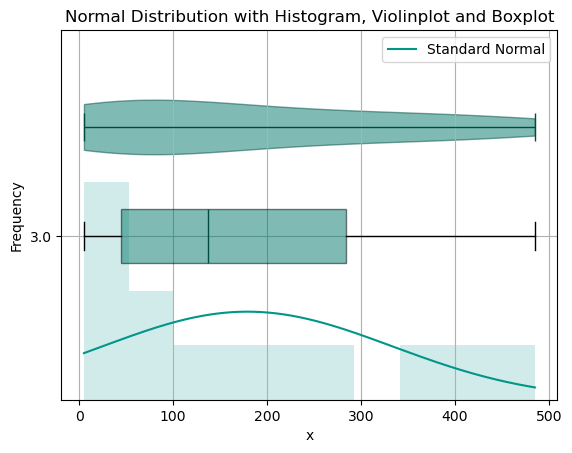

In [12]:
# Create histogram
hist_counts, bins, _ = plt.hist(
  y_observed, bins=10, alpha=0.6,
  color=tealScale[1])

# Plot normal distribution scaled to match histogram
plt.plot(x_range, scaled_y_standard,
  label='Standard Normal', color=tealScale[5])

# Plot violin plot horizontally
violin = plt.violinplot(y_observed,
  vert=False, positions=[max_bin_value], widths=1)

for pc in violin["bodies"]:
    pc.set_facecolor(tealScale[7])
    pc.set_edgecolor(tealScale[9])
    pc.set_alpha(0.5)

# Make all the violin statistics marks red:
for partname in ('cbars','cmins','cmaxes'):
    vp = violin[partname]
    vp.set_edgecolor(tealScale[9])
    vp.set_linewidth(1)

# Plot boxplot
plt.boxplot(y_observed,
  vert=False, positions=[max_bin_value-2],
  widths=1, patch_artist=True,
  boxprops=dict(facecolor=tealScale[7], alpha=0.5),
  medianprops=dict(color=tealScale[9]))

# Set the y-axis limits with a gap at the top
plt.ylim(plt.ylim()[0], plt.ylim()[1] + 1)

# Add labels and title
plt.xlabel('x')
plt.ylabel('Frequency')  # or 'Counts'
plt.title('Normal Distribution '
  + 'with Histogram, Violinplot and Boxplot')
plt.legend()

# Show grid
plt.grid(True)